In [1]:
import tensorflow as tf
import numpy as np

In [5]:
!conda install pip
!pip install tflearn
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
print(x.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
train_data, val_data, train_labels, val_labels = train_test_split(x, y, test_size=0.1)

/bin/bash: conda: command not found
     |████████████████████████████████| 112kB 9.0MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp36-none-any.whl size=127301 sha256=83aac487d31c461a9f5ac2b511a0849a6630ae3b14b4fcb718efd59ce3f15e42
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn
Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!
(1360, 224, 224, 3)
(1360, 17)


In [6]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=96,padding='valid', activation='relu',input_shape=(224,224,3),kernel_size=(11,11),strides=(4,4)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(tf.keras.layers.BatchNormalization())


In [7]:
model.add(tf.keras.layers.Conv2D(filters=256,padding='valid',strides=(1,1),kernel_size=(5,5),activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))

model.add(tf.keras.layers.BatchNormalization())


In [8]:
model.add(tf.keras.layers.Conv2D(filters=384,padding='valid',strides=(1,1),kernel_size=(3,3),activation='relu'))

In [9]:
model.add(tf.keras.layers.Conv2D(filters=384,padding='valid',strides=(1,1),kernel_size=(3,3),activation='relu'))

In [10]:
model.add(tf.keras.layers.Conv2D(filters=256,padding='valid',strides=(1,1),kernel_size=(3,3),activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))



In [11]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

In [12]:
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

In [13]:
 model.add(tf.keras.layers.Dense(17, activation='softmax'))
#model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [16]:
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [17]:
history = model.fit(train_data, train_labels, epochs=100, batch_size=64, verbose=1, shuffle=True,validation_split = 0.1)

Train on 1101 samples, validate on 123 samples
Epoch 1/100
1101/1101 [==============================] - ETA: 0s - loss: 0.0750 - acc: 0.0963

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1101/1101 [==============================] - 9s 8ms/sample - loss: 0.0750 - acc: 0.0963 - val_loss: 0.1039 - val_acc: 0.0894
Epoch 2/100
1101/1101 [==============================] - 1s 889us/sample - loss: 0.0685 - acc: 0.1135 - val_loss: 0.1100 - val_acc: 0.0650
Epoch 3/100
1101/1101 [==============================] - 1s 893us/sample - loss: 0.0619 - acc: 0.1599 - val_loss: 0.1089 - val_acc: 0.0650
Epoch 4/100
1101/1101 [==============================] - 1s 894us/sample - loss: 0.0593 - acc: 0.1916 - val_loss: 0.0733 - val_acc: 0.1057
Epoch 5/100
1101/1101 [==============================] - 1s 891us/sample - loss: 0.0579 - acc: 0.2298 - val_loss: 0.0720 - val_acc: 0.1057
Epoch 6/100
1101/1101 [==============================] - 1s 897us/sample - loss: 0.0578 - acc: 0.2289 - val_loss: 0.0567 - val_acc: 0.1545
Epoch 7/100
1101/1101 [==============================] - 1s 901us/sample - loss: 0.0568 - acc: 0.2516 - val_loss: 0.0569 - val_acc: 0.1545
Epoch 8/100
1101/1101 [==================

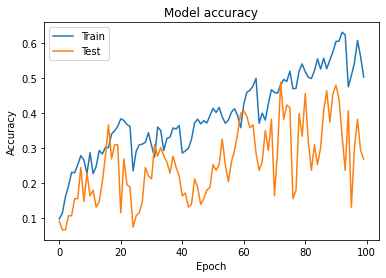

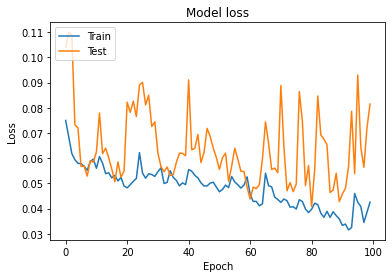

In [18]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
results = model.predict(val_data)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [20]:
a = np.multiply(results,val_labels)

In [21]:
a = np.sum(a,axis = 1)

In [22]:
np.sort(results, axis=1)

array([[2.1192788e-15, 5.7956904e-15, 2.7152370e-14, ..., 2.5111076e-06,
        4.3018616e-05, 9.9995446e-01],
       [1.4948270e-08, 1.6007992e-07, 1.7242883e-05, ..., 1.5040342e-02,
        1.6842024e-02, 9.3681043e-01],
       [4.6586063e-14, 7.3881938e-13, 6.4988670e-12, ..., 3.8484882e-06,
        4.3148975e-06, 9.9998713e-01],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [9.9711567e-15, 1.1776990e-13, 4.5557755e-12, ..., 1.7060121e-07,
        8.0981800e-07, 9.9999869e-01],
       [3.0901009e-15, 1.7754107e-14, 4.6386365e-13, ..., 1.6301063e-07,
        2.9732979e-07, 9.9999940e-01]], dtype=float32)

In [23]:
result1 = (a == np.max(results,axis = 1))

In [24]:
print(np.sum(result1)/result1.size)

0.25


In [25]:
result5 = np.array(a>results[:,11])
print(np.sum(result5)/result5.size)

0.7720588235294118
